In [1]:
import math
import random
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns 
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import k_means

df = pd.read_csv("Live.csv")

df=df.drop(columns={'Column1','Column2','Column3','Column4'},axis=1)

df=df.drop(columns={'status_id','status_published'},axis=1)

x= df
y= df['status_type']

the above code is the amalgamation of what was done on the previous day 

now we proceed with day 12

In [7]:
le = LabelEncoder()

x['status_type']=le.fit_transform(x['status_type'])
y=le.transform(y)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


the categorical data was transformed into numeric using a label encoder with the transform steps above


In [8]:
cols=x.columns

In [9]:
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()

x=ms.fit_transform(x)

In [10]:
x=pd.DataFrame(x,columns=[cols])
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# K-Means model with two clusters

In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2 , random_state=0)
kmeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


## kmeans property study

In [15]:
kmeans.inertia_
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

check quality of weak classification

In [17]:
labels=kmeans.labels_
correct_labels = sum(y==labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels,y.size))

Result: 4288 out of 7050 samples were correctly labeled.


In [18]:
print('Accuracy Score:{0:0.2f}'.format(correct_labels/float(y.size)))

Accuracy Score:0.61


## USing elbow method to find the optimal number of clusters


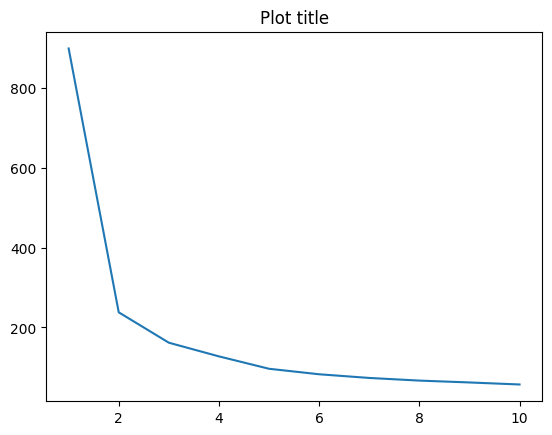

In [ ]:
from sklearn.cluster import KMeans
cs=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title('Elbow method')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()